<a href="https://colab.research.google.com/github/ajaythakur3369/The-Sparks-Foundation-Internship/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Stock Market Prediction**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - The Sparks Foundation**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/The-Sparks-Foundation-Internship)**

# **Problem Statement -**

**Objective -** Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices and sentimental analysis of news headlines.

Analyze and predict the stock of SENSEX (S&P BSE SENSEX).

Use either R or Python, or both for separate analysis, and then combine the findings to create a hybrid model.

You are free to select a different stock to analyze and a news dataset as well while not changing the objective of the task.


# **General Guidelines -**  

Task submission:

1. Host the code on a GitHub Repository (public). Record the code and output in a video. Post the video on YouTube.

2. Share the links of the code (GitHub) and video (YouTube) as a post on your LinkedIn profile.

3. Submit the LinkedIn link in the Task Submission Form when shared.

4. Please read FAQs on how to submit the tasks.

# **Let's Begin !**

### **Import libraries**

In [ ]:
# Imported all necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## **Step 1 : Importing the Numerical dataset and performing Exploratory Analysis**

In [ ]:
# Access the Drive from Colab to access the required file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Dataframe for exploratory analysis
df=pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/The_Sparks_Foundation/File_Name/Stock_price_dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0


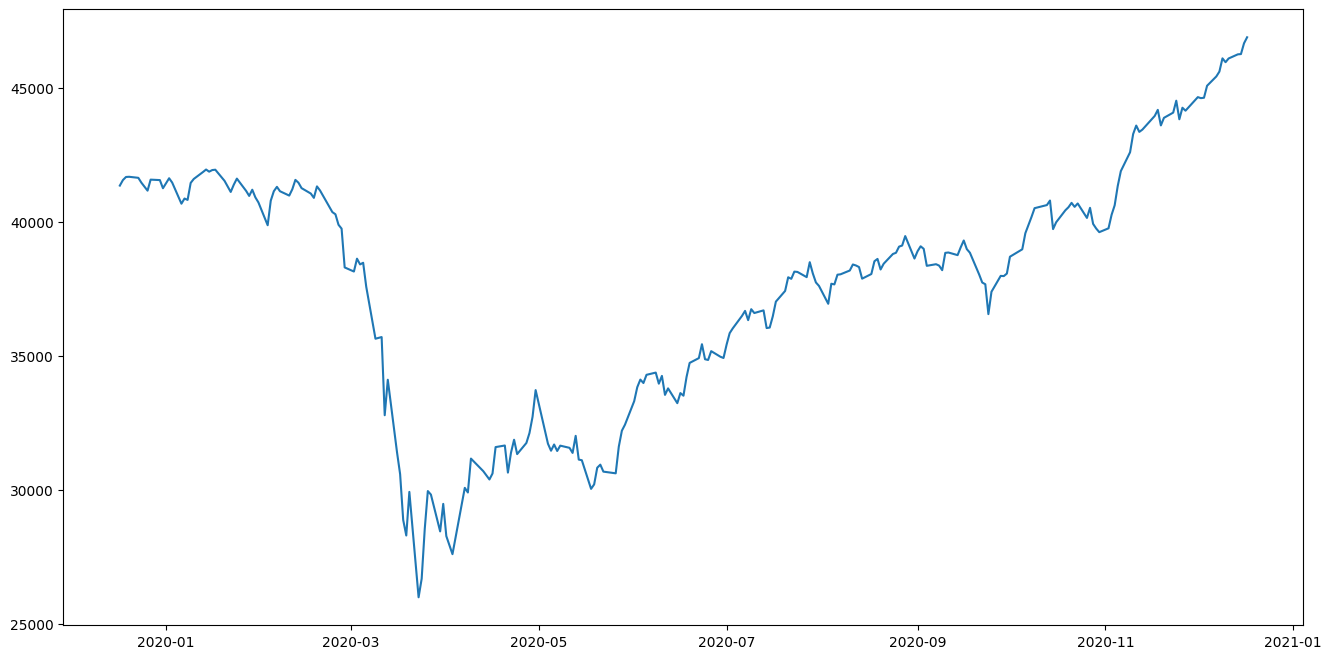

In [ ]:
# Extract date frame and plot closing stock price w.r.t time
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.dropna(inplace=True)
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')
plt.show()

In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

## **Step 2 : Creating a dataframe for storing the Closing stock data per day**

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(df2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df2)-look_back-1):
		a = df2[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df2[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/The_Sparks_Foundation/File_Name/Stock_price_dataset.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

## **Step 3 : Data Normalization and Division into Training and Test sets**

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [ ]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

## **Step 4 : Creating a LSTM for Numerical Analysis**

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
163/163 - 3s - loss: 0.0224 - 3s/epoch - 20ms/step
Epoch 2/100
163/163 - 1s - loss: 0.0042 - 616ms/epoch - 4ms/step
Epoch 3/100
163/163 - 0s - loss: 0.0024 - 398ms/epoch - 2ms/step
Epoch 4/100
163/163 - 0s - loss: 0.0019 - 389ms/epoch - 2ms/step
Epoch 5/100
163/163 - 0s - loss: 0.0018 - 392ms/epoch - 2ms/step
Epoch 6/100
163/163 - 0s - loss: 0.0019 - 460ms/epoch - 3ms/step
Epoch 7/100
163/163 - 0s - loss: 0.0018 - 407ms/epoch - 2ms/step
Epoch 8/100
163/163 - 0s - loss: 0.0018 - 423ms/epoch - 3ms/step
Epoch 9/100
163/163 - 0s - loss: 0.0018 - 404ms/epoch - 2ms/step
Epoch 10/100
163/163 - 0s - loss: 0.0018 - 411ms/epoch - 3ms/step
Epoch 11/100
163/163 - 0s - loss: 0.0019 - 418ms/epoch - 3ms/step
Epoch 12/100
163/163 - 0s - loss: 0.0018 - 398ms/epoch - 2ms/step
Epoch 13/100
163/163 - 0s - loss: 0.0017 - 401ms/epoch - 2ms/step
Epoch 14/100
163/163 - 0s - loss: 0.0018 - 400ms/epoch - 2ms/step
Epoch 15/100
163/163 - 0s - loss: 0.0017 - 441ms/epoch - 3ms/step
Epoch 16/100
163/163 

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

3/3 [==============================] - 0s 4ms/step


## **Step 5 : Making Predictions**

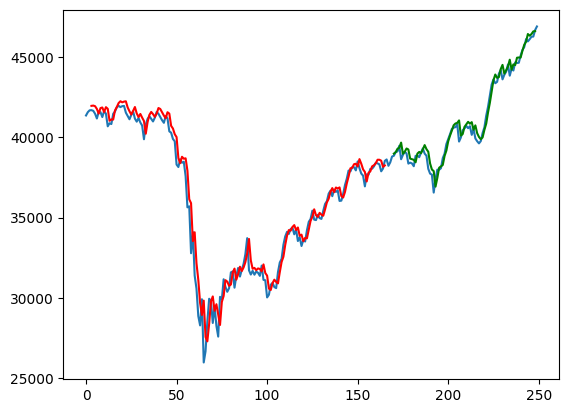

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error = ",testScore," RMSE")

Root mean square error =  788.672311179615  RMSE
Root mean square error =  437.5518776976887  RMSE


## **Step 6 : Creating a Hybrid model for Numerical and textual Analysis**

In [ ]:
# Text Analysis
columns = ['Date','Category','News']
news = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/The_Sparks_Foundation/File_Name/News_headlines_dataset.csv', names = columns)
news

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3650966,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650967,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650968,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650969,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


## **Step 7 : Text preprocessing**

In [ ]:
news.drop(0, inplace=True)
news.drop('Category', axis = 1, inplace=True)
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 1 to 3650970
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 55.7+ MB


In [ ]:
# Restructuring the date format
news['Date'] = pd.to_datetime(news['Date'],format= '%Y%m%d')
news

,Date,News
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa
5,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3650966,2022-03-31,J&K sacks 2 cops; 3 other employees over terro...
3650967,2022-03-31,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650968,2022-03-31,As Covid-19 cases drop to nil in southern dist...
3650969,2022-03-31,Tamil Nadu sees marginal rise of Covid cases w...


In [ ]:
#Grouping the headlines for each day
news['News'] = news.groupby(['Date']).transform(lambda x : ' '.join(x))
news = news.drop_duplicates()
news.reset_index(inplace = True, drop = True)
news

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...
7713,2022-03-28,As fashion becomes democratic; demand for styl...
7714,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...
7715,2022-03-30,I will not give in to trends: Dossmode The tim...


In [ ]:
news['News']

0       Status quo will not be disturbed at Ayodhya; s...
1       Powerless north India gropes in the dark Think...
2       The string that pulled Stephen Hawking to Indi...
3       Light combat craft takes India into club class...
4       Light combat craft takes India into club class...
                              ...                        
7712    Playing a dead man in Body God meant sitting i...
7713    As fashion becomes democratic; demand for styl...
7714    Bobby Deol: Like my dad; I hope to be working ...
7715    I will not give in to trends: Dossmode The tim...
7716    Shashank goes back to coastal Karnataka and Mo...
Name: News, Length: 7717, dtype: object

## **Step 8 : Adding subjectivity and polarity Scores**

In [ ]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
#Adding subjectivity and polarity columns
news['Subjectivity'] = news['News'].apply(getSubjectivity)
news['Polarity'] = news['News'].apply(getPolarity)
news

,Date,News,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.369592,0.025109
7713,2022-03-28,As fashion becomes democratic; demand for styl...,0.389939,0.055878
7714,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...,0.404240,0.095198
7715,2022-03-30,I will not give in to trends: Dossmode The tim...,0.350965,0.037729


## **Step 9 : Visualizing the polarity and Subjectivity scores**

<Axes: >

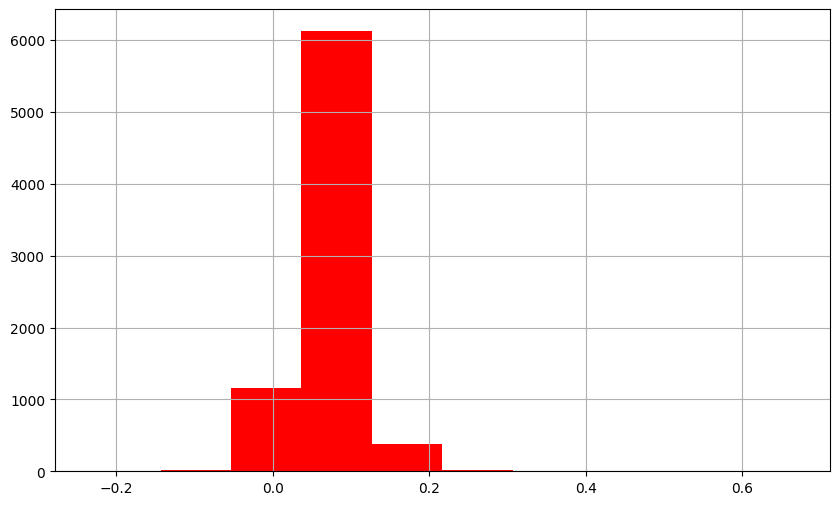

In [ ]:
plt.figure(figsize = (10,6))
news['Polarity'].hist(color = 'red')

<Axes: >

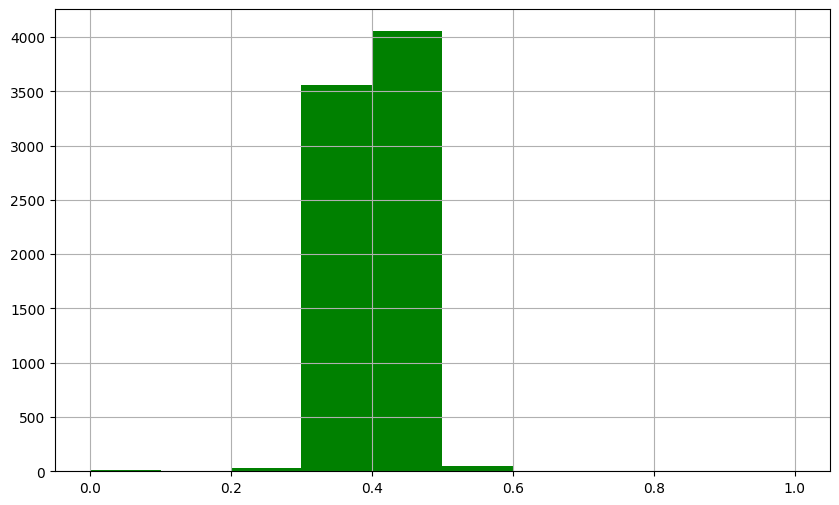

In [ ]:
plt.figure(figsize = (10,6))
news['Subjectivity'].hist(color = 'green')

## **Step 10 : Performing Sentiment Analysis over the news Headlines**

In [ ]:
#Adding sentiment score to news
sia = SentimentIntensityAnalyzer()
news['Compound'] = [sia.polarity_scores(v)['compound'] for v in news['News']]
news['Negative'] = [sia.polarity_scores(v)['neg'] for v in news['News']]
news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news['News']]
news['Positive'] = [sia.polarity_scores(v)['pos'] for v in news['News']]
news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.369592,0.025109,-0.9999,0.154,0.764,0.082
7713,2022-03-28,As fashion becomes democratic; demand for styl...,0.389939,0.055878,-0.9999,0.158,0.742,0.100
7714,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...,0.404240,0.095198,-0.9999,0.152,0.766,0.082
7715,2022-03-30,I will not give in to trends: Dossmode The tim...,0.350965,0.037729,-0.9999,0.151,0.775,0.074


## **Step 11 : Merging the numerical and textual data**

In [ ]:
merge = news
merge

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.369592,0.025109,-0.9999,0.154,0.764,0.082
7713,2022-03-28,As fashion becomes democratic; demand for styl...,0.389939,0.055878,-0.9999,0.158,0.742,0.100
7714,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...,0.404240,0.095198,-0.9999,0.152,0.766,0.082
7715,2022-03-30,I will not give in to trends: Dossmode The tim...,0.350965,0.037729,-0.9999,0.151,0.775,0.074


In [ ]:
dff = merge[['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
dff

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...
7712,0.369592,0.025109,-0.9999,0.154,0.764,0.082
7713,0.389939,0.055878,-0.9999,0.158,0.742,0.100
7714,0.404240,0.095198,-0.9999,0.152,0.766,0.082
7715,0.350965,0.037729,-0.9999,0.151,0.775,0.074


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(dff))
new_df.columns = dff.columns
new_df.index = dff.index
new_df.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.427407,0.00945,0.274775,0.807,0.116776
1,0.407692,0.357550,0.36800,0.274775,0.766,0.182566
2,0.446847,0.356994,0.93690,0.225225,0.797,0.169408
3,0.476612,0.550397,0.98845,0.279279,0.719,0.258224
4,0.439394,0.535354,0.28925,0.342342,0.704,0.235197


In [ ]:
X = new_df[0:250]
y =df['Close']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(200, 6)

In [ ]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
71,0.410909,0.388328,0.85655,0.180180,0.833,0.143092
160,0.340023,0.242115,0.00090,0.337838,0.774,0.125000
180,0.421230,0.376940,0.00200,0.335586,0.738,0.185855
75,0.415278,0.196759,0.03055,0.265766,0.828,0.090461
59,0.493362,0.476381,0.08270,0.376126,0.705,0.210526
101,0.424206,0.369048,0.09630,0.297297,0.758,0.182566
229,0.383692,0.296192,0.00030,0.344595,0.753,0.154605
18,0.410714,0.361523,0.12245,0.297297,0.744,0.203947
188,0.401574,0.370227,0.00135,0.308559,0.745,0.195724
15,0.292222,0.437830,0.92240,0.299550,0.714,0.251645


## **Step 12 : Training a Random Forest Regressor and Adaboost Regressor for hybrid analysis**

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

## **Step 13 : Determining the accuracy scores for both the Models**

In [ ]:
print(prediction[:10])
print(y_test[:10])
print("Root mean square error = ",math.sqrt(mean_squared_error(prediction,y_test))," RMSE")

[41394.19199248 34070.49521488 36106.41292967 33821.07808604
 40808.31414073 41956.41375019 40650.25246102 37483.49707037
 36072.8437695  40734.16156258]
Date
2020-11-11    43593.671875
2020-06-18    34208.050781
2020-05-06    31685.750000
2020-08-06    38025.449219
2020-08-03    36939.601563
2020-08-12    38369.628906
2020-10-05    38973.699219
2020-04-22    31379.550781
2020-03-19    28288.230469
2020-08-04    37687.910156
Name: Close, dtype: float64
Root mean square error =  4209.133894404607  RMSE


In [ ]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [ ]:
print("Root mean square error = ",math.sqrt(mean_squared_error(predictions, y_test))," RMSE")

Root mean square error =  3793.7549109129345  RMSE


I have used two models, i.e., Random Forest Regressor and Adaboost Regressor to carry out hybrid analysis. From the RMSE values we see that Random Forest Regressor gives a mode accurate output (3960 RMSE). However, both the models have very high RMSE values. The reason for high values is the unpredictible nature of the stock prices.

## **Conclusion**

I was able to create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.